# XGBoost - Titanic (Classification)

[Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/overview)

In [1]:
import pandas as pd

data_path = './titanic/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'gender_submission.csv')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train.isna().sum().sum()

866

In [7]:
test.isna().sum().sum()

414

In [8]:
train[train.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [9]:
train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [12]:
train.dropna(inplace=True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [14]:
test.dropna(inplace=True)

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 12 to 414
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  87 non-null     int64  
 1   Pclass       87 non-null     int64  
 2   Name         87 non-null     object 
 3   Sex          87 non-null     object 
 4   Age          87 non-null     float64
 5   SibSp        87 non-null     int64  
 6   Parch        87 non-null     int64  
 7   Ticket       87 non-null     object 
 8   Fare         87 non-null     float64
 9   Cabin        87 non-null     object 
 10  Embarked     87 non-null     object 
dtypes: float64(2), int64(4), object(5)
memory usage: 8.2+ KB


In [16]:
train['Age'].value_counts()

36.0    11
24.0     9
19.0     6
35.0     6
31.0     5
        ..
71.0     1
3.0      1
1.0      1
36.5     1
26.0     1
Name: Age, Length: 63, dtype: int64

In [17]:
#train['Agegroup'].apply('age')

In [18]:
train.loc[train['Age'] <= 5, 'group'] = 'toddler'
train.loc[(train['Age'] > 5) & (train['Age'] <= 13), 'group'] = 'kids'
train.loc[(train['Age'] > 13) & (train['Age'] <= 30), 'group'] = 'youth'
train.loc[(train['Age'] > 30) & (train['Age'] <= 60), 'group'] = 'middle'
train.loc[ train['Age'] > 60, 'group'] = 'senior'

train = train.drop(['Age'], axis=1)

In [19]:
train

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,group
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,middle
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,middle
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625,E46,S,middle
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,1,1,PP 9549,16.7000,G6,S,toddler
11,12,1,1,"Bonnell, Miss. Elizabeth",female,0,0,113783,26.5500,C103,S,middle
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,1,1,11751,52.5542,D35,S,middle
872,873,0,1,"Carlsson, Mr. Frans Olof",male,0,0,695,5.0000,B51 B53 B55,S,middle
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,0,1,11767,83.1583,C50,C,middle
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,youth


In [20]:
#train['Sex'].replace(('male', 'female'), (1, 0), inplace=True)

In [21]:
train['Fare'].value_counts()

26.5500     7
53.1000     5
90.0000     4
10.5000     4
13.0000     4
           ..
211.5000    1
8.0500      1
81.8583     1
27.7500     1
5.0000      1
Name: Fare, Length: 93, dtype: int64

In [22]:
#def get_categorise(df):
#    return pd.qcut(df, q=4, labels = ['low','medium','high','very_high'])
#    
#FareLevel = get_categorise(train['Fare'])
#FareLevel.value_counts()

In [23]:
#train['Fare'] = FareLevel

In [24]:
train.loc[train['Fare'] <= 20, 'Level'] = 'L1'
train.loc[(train['Fare'] > 20) & (train['Fare'] <= 40), 'Level'] = 'L2'
train.loc[(train['Fare'] > 40) & (train['Fare'] <= 60), 'Level'] = 'L3'
train.loc[(train['Fare'] > 60) & (train['Fare'] <= 80), 'Level'] = 'L4'
train.loc[train['Fare'] > 80, 'Fare'] = 'L4'

train = train.drop(['Fare'], axis=1)

In [25]:
train['Level'].value_counts()

L2    45
L4    29
L3    27
L1    23
Name: Level, dtype: int64

In [26]:
# Title 
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+\.)', name)
    
    if title_search:
        return title_search.group(1)
    return ""

In [27]:
train['Title'] = train['Name'].apply(get_title)
train['Title'].value_counts()

Mr.          81
Miss.        44
Mrs.         38
Master.       7
Dr.           3
Major.        2
Mlle.         2
Mme.          1
Lady.         1
Sir.          1
Col.          1
Capt.         1
Countess.     1
Name: Title, dtype: int64

In [28]:
train['Title'] = train['Title'].replace(['Capt.', 'Dr.', 'Major.', 'Rev.'], 'Officer.')
train['Title'] = train['Title'].replace(['Lady.', 'Countess.', 'Don.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Royal.')
train['Title'] = train['Title'].replace(['Mlle.', 'Ms.'], 'Miss.')
train['Title'] = train['Title'].replace(['Mme.'], 'Mrs.')
train['Title'].value_counts()

Mr.         81
Miss.       46
Mrs.        39
Master.      7
Officer.     6
Royal.       3
Col.         1
Name: Title, dtype: int64

In [29]:
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
train['Title']=train.apply(replace_titles, axis=1)


In [30]:
train['Cabin'] = train['Cabin'].fillna('Missing')
train['Cabin'] = train['Cabin'].str[0]
train['Cabin'].value_counts()

# train = train.drop(['Cabin'], axis=1)

C    51
B    43
D    31
E    30
A    12
F    11
G     4
T     1
Name: Cabin, dtype: int64

In [31]:
train = train.drop(['PassengerId','Ticket', 'Name'], axis=1)

In [32]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,group,Level,Title
1,1,1,female,1,0,C,C,middle,L4,Mrs.
3,1,1,female,1,0,C,S,middle,L3,Mrs.
6,0,1,male,0,0,E,S,middle,L3,Mr.
10,1,3,female,1,1,G,S,toddler,L1,Miss.
11,1,1,female,0,0,C,S,middle,L2,Miss.


In [33]:
train = pd.get_dummies(train)

In [34]:
train

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Level_L2,Level_L3,Level_L4,Title_Col.,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Officer.,Title_Royal.
1,1,1,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,1,1,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
6,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
10,1,3,1,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11,1,1,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,1,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
872,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
879,1,1,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
887,1,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [35]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

#test = test.drop(['PassengerId', 'Survived'], axis=1)

In [36]:
X

,Pclass,SibSp,Parch,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,...,Level_L2,Level_L3,Level_L4,Title_Col.,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Officer.,Title_Royal.
1,1,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,1,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
6,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
10,3,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11,1,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,1,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
872,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
879,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
887,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [37]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p38/bin/python -m pip install --upgrade pip' command.


In [38]:
from xgboost import XGBClassifier
# model = XGBClassifier(booster='gbtree', objective='binary:logistic')
model = XGBClassifier()

In [39]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(model, X, y, cv=5)

print('Accuracy:', np.round(scores, 2))
print('Avg. Accuracy: %0.2f' % (scores.mean()))

Accuracy: [0.81 0.81 0.68 0.64 0.78]
Avg. Accuracy: 0.74


In [40]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

scores = cross_val_score(model, X, y, cv=kfold)

print('Accuracy:', np.round(scores, 2))
print('Avg. Accuracy: %0.2f' % (scores.mean()))

Accuracy: [0.73 0.65 0.65 0.69 0.78]
Avg. Accuracy: 0.70


### Evaluation

In [41]:
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [43]:
y_pred = model.predict(X)

In [44]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        60
           1       0.96      0.97      0.96       123

    accuracy                           0.95       183
   macro avg       0.95      0.94      0.94       183
weighted avg       0.95      0.95      0.95       183



In [45]:
model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

### Feature Importances

In [46]:
print(model.feature_importances_)

[0.01147278 0.02158138 0.02760536 0.01119412 0.         0.01192178
 0.03149822 0.0266267  0.01732868 0.0221893  0.         0.20560889
 0.         0.02028625 0.         0.02034098 0.         0.01743883
 0.05381352 0.02352934 0.02085482 0.02357034 0.01683375 0.01830932
 0.04640351 0.         0.         0.01810908 0.2582668  0.01624284
 0.05897346 0.        ]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

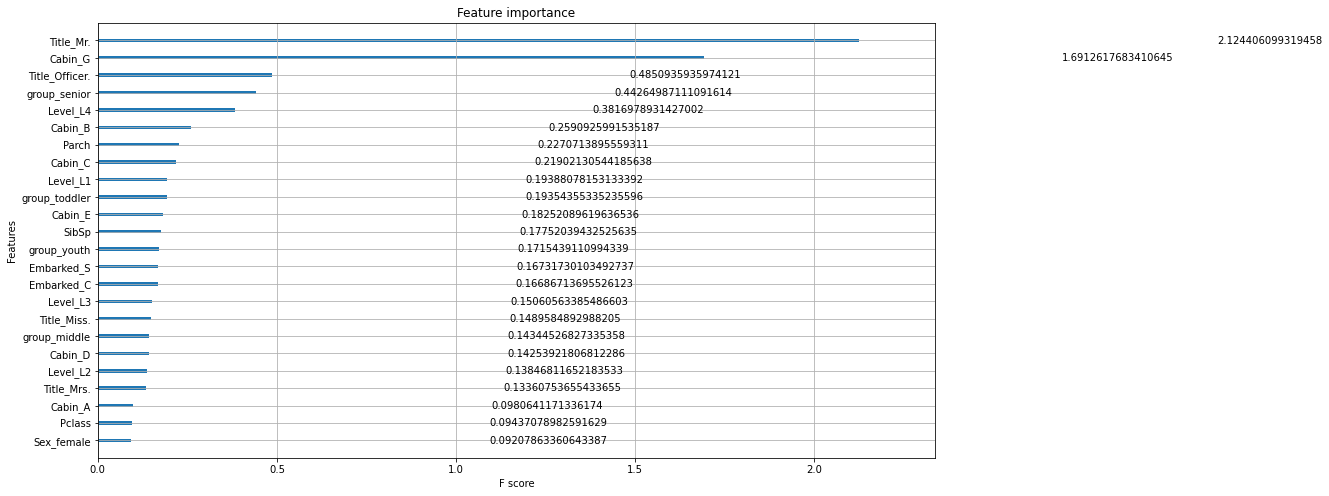

In [47]:
import xgboost as xgb

feature_data = xgb.DMatrix(X)
model.get_booster().feature_names = feature_data.feature_names
model.get_booster().feature_types = feature_data.feature_types

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 8))
xgb.plot_importance(model, ax=ax, importance_type='gain')

In [48]:
print(model.get_booster().feature_names)

['Pclass', 'SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'group_kids', 'group_middle', 'group_senior', 'group_toddler', 'group_youth', 'Level_L1', 'Level_L2', 'Level_L3', 'Level_L4', 'Title_Col.', 'Title_Master.', 'Title_Miss.', 'Title_Mr.', 'Title_Mrs.', 'Title_Officer.', 'Title_Royal.']


### Submission

In [49]:
pred = model.predict(test)
submission['Survived'] = pred

ValueError: Feature shape mismatch, expected: 32, got 11

In [ ]:
submission.to_csv("submission.csv", index=False)